In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from numpy import dot
from numpy.linalg import norm
from scipy import spatial

In [ ]:
df = pd.read_csv('cleaned_dino_data.csv')

In [ ]:
df.head()

,name,diet,lived_in,type,taxonomy,species,period_name,period_start,period_end,length_meters
0,aardonyx,herbivorous,South Africa,sauropod,Dinosauria Saurischia Sauropodomorpha Prosauro...,celestae,Early Jurassic,199,189,8.0
1,abelisaurus,carnivorous,Argentina,large theropod,Dinosauria Saurischia Theropoda Neotheropoda C...,comahuensis,Late Cretaceous,74,70,9.0
2,achelousaurus,herbivorous,USA,ceratopsian,Dinosauria Ornithischia Genasauria Cerapoda Ma...,horneri,Late Cretaceous,83,70,6.0
3,achillobator,carnivorous,Mongolia,large theropod,Dinosauria Saurischia Theropoda Neotheropoda T...,giganteus,Late Cretaceous,99,84,5.0
4,acrocanthosaurus,carnivorous,USA,large theropod,Dinosauria Saurischia Theropoda Neotheropoda T...,atokensis,Early Cretaceous,115,105,12.0


In [ ]:
# df = df.drop(df.columns[0], axis=1)

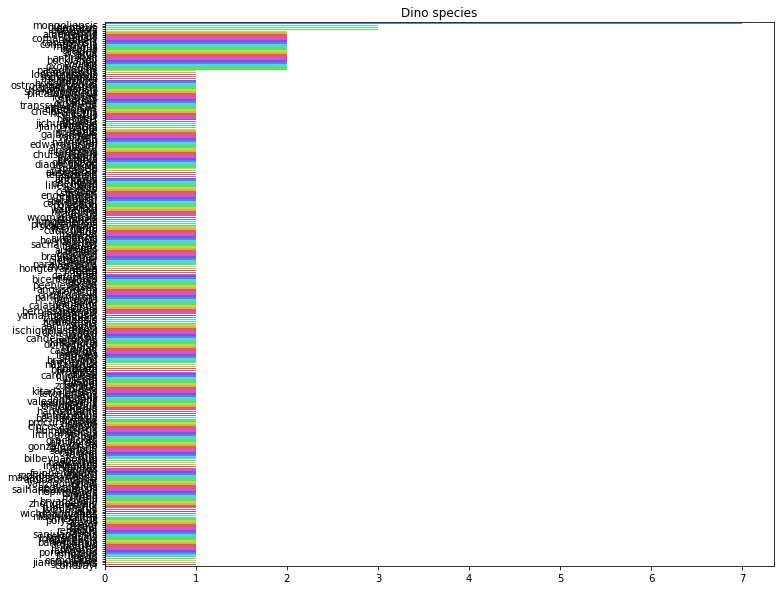

In [ ]:
plt.subplots(figsize=(12,10))
ax = pd.Series(df['diet']).value_counts().sort_values(ascending=True).plot.barh(width = 0.9, color=sns.color_palette('hls', 10))
plt.title('Dino Diets')
plt.show()

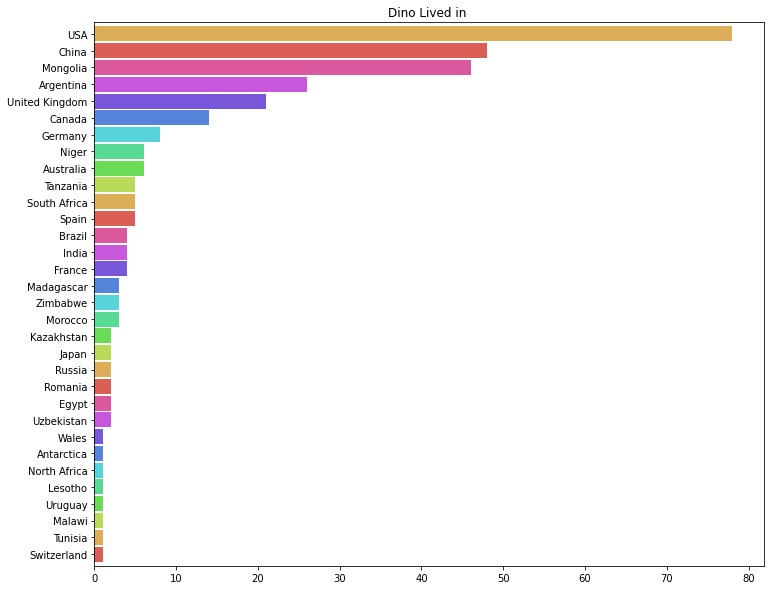

In [ ]:
plt.subplots(figsize=(12,10))
ax = pd.Series(df['lived_in']).value_counts().sort_values(ascending=True).plot.barh(width = 0.9, color=sns.color_palette('hls', 10))
plt.title('Dino Lived in ')
plt.show()

In [7]:
df['type'] = df['type'].replace('9999', 'unknown')

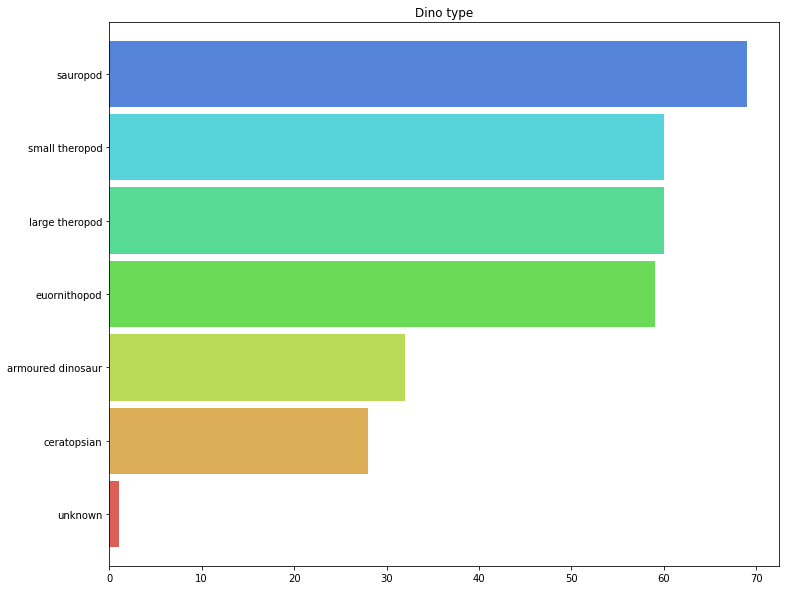

In [8]:
plt.subplots(figsize=(12,10))
ax = pd.Series(df['type']).value_counts().sort_values(ascending=True).plot.barh(width = 0.9, color=sns.color_palette('hls', 10))
plt.title('Dino type')
plt.show()

In [9]:
df['period_name'] = df['period_name'].replace('9999', 'unknown')

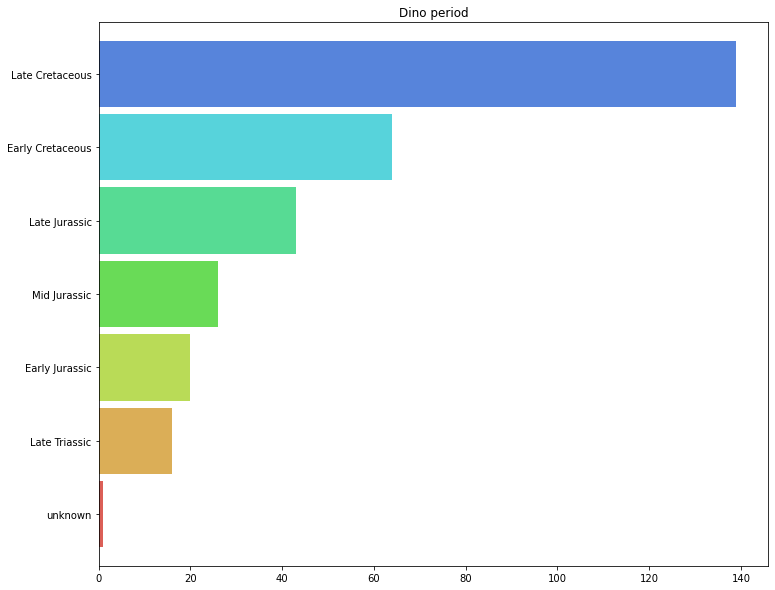

In [10]:
plt.subplots(figsize=(12,10))
ax = pd.Series(df['period_name']).value_counts().sort_values(ascending=True).plot.barh(width = 0.9, color=sns.color_palette('hls', 10))
plt.title('Dino period')
plt.show()

In [11]:
df = df.drop(['period_start', 'period_end', 'species', 'taxonomy', 'length_meters'], axis = 1)

In [12]:
df.columns

Index(['name', 'diet', 'lived_in', 'type', 'period_name'], dtype='object')

In [13]:
#Construct a reverse map of indices and dinosaur names
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

In [14]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [15]:
# Apply clean_data function to your features.
features = ['diet', 'lived_in', 'type', 'period_name']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [16]:
df.columns

Index(['name', 'diet', 'lived_in', 'type', 'period_name'], dtype='object')

In [17]:
def create_soup(x):
    return ' '.join(x['diet']) + ' '.join(x['lived_in']) + ' '.join(x['type']) + ' '.join(x['period_name'])

In [18]:
# Create a new soup feature
df['soup'] = df.apply(create_soup, axis=1)

In [19]:
df[['soup']].head(2)

,soup
0,h e r b i v o r o u ss o u t h a f r i c as a ...
1,c a r n i v o r o u sa r g e n t i n al a r g ...


In [20]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

In [21]:
count_matrix.shape

(309, 48)

In [22]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [23]:
# Reset index of your main DataFrame and construct reverse mapping as before
df = df.reset_index()
indices = pd.Series(df.index, index=df['name'])

In [ ]:
faveDino = input("Enter your favourite dinosaur: ")

In [ ]:
get_recommendations(faveDino, cosine_sim2)